Machine Learning Review-1

In [ ]:
# df: For each model
# dataset: Entire

# Implementation:

# Preprocessing

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import sklearn

In [186]:
df=pd.read_csv(r'city_day.csv')

In [187]:
df.describe()   # 75% --> eg: 75% of fare is below 31.0 

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,24933.000000,18391.000000,25949.000000,25946.000000,25346.000000,19203.000000,27472.000000,25677.000000,25509.000000,23908.000000,21490.000000,11422.000000,24850.000000
mean,67.450578,118.127103,17.574730,28.560659,32.309123,23.483476,2.248598,14.531977,34.491430,3.280840,8.700972,3.070128,166.463581
std,64.661449,90.605110,22.785846,24.474746,31.646011,25.684275,6.962884,18.133775,21.694928,15.811136,19.969164,6.323247,140.696585
min,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000
25%,28.820000,56.255000,5.630000,11.750000,12.820000,8.580000,0.510000,5.670000,18.860000,0.120000,0.600000,0.140000,81.000000
50%,48.570000,95.680000,9.890000,21.690000,23.520000,15.850000,0.890000,9.160000,30.840000,1.070000,2.970000,0.980000,118.000000
75%,80.590000,149.745000,19.950000,37.620000,40.127500,30.020000,1.450000,15.220000,45.570000,3.080000,9.150000,3.350000,208.000000
max,949.990000,1000.000000,390.680000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,2049.000000


In [188]:
# dataset-->For only city 'Delhi'

In [189]:
dataset=df[df['City']=='Delhi']

In [190]:
print(dataset.shape) # 48192 rows. 16 columns

(2009, 16)


In [191]:
dataset.isnull().sum(axis = 0)  # axis=1 gives no.of null values in every row. axis=0 implies column

City            0
Date            0
PM2.5           2
PM10           77
NO              2
NO2             2
NOx             0
NH3             9
CO              0
SO2           110
O3             84
Benzene         0
Toluene         0
Xylene        781
AQI            10
AQI_Bucket     10
dtype: int64

In [192]:
# Replacing null values with some values

dataset['PM2.5']=dataset['PM2.5'].fillna(dataset['PM2.5'].mean())
dataset['PM10']=dataset['PM10'].fillna(dataset['PM10'].mean())
dataset['NO']=dataset['NO'].fillna(dataset['NO'].mean())
dataset['NO2']=dataset['NO2'].fillna(dataset['NO2'].mean())
dataset['NOx']=dataset['NOx'].fillna(dataset['NOx'].mean())
dataset['NH3']=dataset['NH3'].fillna(dataset['NH3'].mean())
dataset['CO']=dataset['CO'].fillna(dataset['CO'].mean())
dataset['SO2']=dataset['SO2'].fillna(dataset['SO2'].mean())
dataset['O3']=dataset['O3'].fillna(dataset['O3'].mean())
dataset['Benzene']=dataset['Benzene'].fillna(dataset['Benzene'].mean())
dataset['Toluene']=dataset['Toluene'].fillna(dataset['Toluene'].mean())
dataset['Xylene']=dataset['Xylene'].fillna(dataset['Xylene'].mean())
# dataset['AQI']=dataset['AQI'].fillna(dataset['AQI'].mean())

C:\Users\rppon\AppData\Local\Temp\ipykernel_3564\515152727.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['PM2.5']=dataset['PM2.5'].fillna(dataset['PM2.5'].mean())
C:\Users\rppon\AppData\Local\Temp\ipykernel_3564\515152727.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['PM10']=dataset['PM10'].fillna(dataset['PM10'].mean())
C:\Users\rppon\AppData\Local\Temp\ipykernel_3564\515152727.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

In [193]:
dataset.isnull().sum(axis=0)

City           0
Date           0
PM2.5          0
PM10           0
NO             0
NO2            0
NOx            0
NH3            0
CO             0
SO2            0
O3             0
Benzene        0
Toluene        0
Xylene         0
AQI           10
AQI_Bucket    10
dtype: int64

In [194]:
# https://stackoverflow.com/questions/73644442/missing-value-in-target-variable

dataset.dropna(subset=['AQI'], inplace=True)
dataset.dropna(subset=['AQI_Bucket'], inplace=True)

C:\Users\rppon\AppData\Local\Temp\ipykernel_3564\982088303.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.dropna(subset=['AQI'], inplace=True)
C:\Users\rppon\AppData\Local\Temp\ipykernel_3564\982088303.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.dropna(subset=['AQI_Bucket'], inplace=True)


In [195]:
dataset.isnull().sum(axis=0)

City          0
Date          0
PM2.5         0
PM10          0
NO            0
NO2           0
NOx           0
NH3           0
CO            0
SO2           0
O3            0
Benzene       0
Toluene       0
Xylene        0
AQI           0
AQI_Bucket    0
dtype: int64

In [196]:
# dataset.boxplot()

In [197]:
dataset.columns

Index(['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')

In [198]:
dataset.dtypes

City           object
Date           object
PM2.5         float64
PM10          float64
NO            float64
NO2           float64
NOx           float64
NH3           float64
CO            float64
SO2           float64
O3            float64
Benzene       float64
Toluene       float64
Xylene        float64
AQI           float64
AQI_Bucket     object
dtype: object

In [199]:
dataset.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
10229,Delhi,01-01-2015,313.22,607.98,69.16,36.39,110.59,33.85,15.20,9.25,41.68,14.36,24.86,9.84,472.0,Severe
10230,Delhi,02-01-2015,186.18,269.55,62.09,32.87,88.14,31.83,9.54,6.65,29.97,10.55,20.09,4.29,454.0,Severe
10231,Delhi,03-01-2015,87.18,131.90,25.73,30.31,47.95,69.55,10.61,2.65,19.71,3.91,10.23,1.99,143.0,Moderate
10232,Delhi,04-01-2015,151.84,241.84,25.01,36.91,48.62,130.36,11.54,4.63,25.36,4.26,9.71,3.34,319.0,Very Poor
10233,Delhi,05-01-2015,146.60,219.13,14.01,34.92,38.25,122.88,9.20,3.33,23.20,2.80,6.21,2.96,325.0,Very Poor


In [200]:
dataset['AQI_Bucket'].unique()

array(['Severe', 'Moderate', 'Very Poor', 'Poor', 'Satisfactory', 'Good'],
      dtype=object)

In [201]:
category_mapping = {
    'Poor': 0,
    'Severe': 1,
    'Very Poor': 2,
    'Moderate': 3,
    'Satisfactory': 4,
    'Good': 5
}

# Map the values in the 'AQI_Bucket' column to integers
dataset['AQI_Bucket'] = dataset['AQI_Bucket'].map(category_mapping)

# Now, the 'AQI_Bucket' column contains integers
print(dataset)

        City        Date   PM2.5    PM10     NO    NO2     NOx     NH3     CO  \
10229  Delhi  01-01-2015  313.22  607.98  69.16  36.39  110.59   33.85  15.20   
10230  Delhi  02-01-2015  186.18  269.55  62.09  32.87   88.14   31.83   9.54   
10231  Delhi  03-01-2015   87.18  131.90  25.73  30.31   47.95   69.55  10.61   
10232  Delhi  04-01-2015  151.84  241.84  25.01  36.91   48.62  130.36  11.54   
10233  Delhi  05-01-2015  146.60  219.13  14.01  34.92   38.25  122.88   9.20   
...      ...         ...     ...     ...    ...    ...     ...     ...    ...   
12233  Delhi  27-06-2020   39.80  155.94  10.88  21.46   22.47   31.43   0.87   
12234  Delhi  28-06-2020   59.52  308.65  12.67  21.60   23.86   29.27   0.94   
12235  Delhi  29-06-2020   44.86  184.12  10.50  21.57   21.94   27.97   0.88   
12236  Delhi  30-06-2020   39.80   91.98   5.99  17.96   15.44   28.48   0.84   
12237  Delhi  01-07-2020   54.01  128.66   6.33  21.05   16.81   29.06   0.97   

         SO2     O3  Benzen

C:\Users\rppon\AppData\Local\Temp\ipykernel_3564\2016903017.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['AQI_Bucket'] = dataset['AQI_Bucket'].map(category_mapping)


In [202]:
dataset.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
10229,Delhi,01-01-2015,313.22,607.98,69.16,36.39,110.59,33.85,15.20,9.25,41.68,14.36,24.86,9.84,472.0,1
10230,Delhi,02-01-2015,186.18,269.55,62.09,32.87,88.14,31.83,9.54,6.65,29.97,10.55,20.09,4.29,454.0,1
10231,Delhi,03-01-2015,87.18,131.90,25.73,30.31,47.95,69.55,10.61,2.65,19.71,3.91,10.23,1.99,143.0,3
10232,Delhi,04-01-2015,151.84,241.84,25.01,36.91,48.62,130.36,11.54,4.63,25.36,4.26,9.71,3.34,319.0,2
10233,Delhi,05-01-2015,146.60,219.13,14.01,34.92,38.25,122.88,9.20,3.33,23.20,2.80,6.21,2.96,325.0,2


In [203]:
dataset.columns


Index(['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')

In [204]:
category_mapping = {
    'Delhi':0
}

# Map the values in the 'AQI_Bucket' column to integers
dataset['City'] = dataset['City'].map(category_mapping)

# Now, the 'AQI_Bucket' column contains integers
print(dataset)


       City        Date   PM2.5    PM10     NO    NO2     NOx     NH3     CO  \
10229     0  01-01-2015  313.22  607.98  69.16  36.39  110.59   33.85  15.20   
10230     0  02-01-2015  186.18  269.55  62.09  32.87   88.14   31.83   9.54   
10231     0  03-01-2015   87.18  131.90  25.73  30.31   47.95   69.55  10.61   
10232     0  04-01-2015  151.84  241.84  25.01  36.91   48.62  130.36  11.54   
10233     0  05-01-2015  146.60  219.13  14.01  34.92   38.25  122.88   9.20   
...     ...         ...     ...     ...    ...    ...     ...     ...    ...   
12233     0  27-06-2020   39.80  155.94  10.88  21.46   22.47   31.43   0.87   
12234     0  28-06-2020   59.52  308.65  12.67  21.60   23.86   29.27   0.94   
12235     0  29-06-2020   44.86  184.12  10.50  21.57   21.94   27.97   0.88   
12236     0  30-06-2020   39.80   91.98   5.99  17.96   15.44   28.48   0.84   
12237     0  01-07-2020   54.01  128.66   6.33  21.05   16.81   29.06   0.97   

         SO2     O3  Benzene  Toluene  

C:\Users\rppon\AppData\Local\Temp\ipykernel_3564\1510208447.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['City'] = dataset['City'].map(category_mapping)


In [205]:
dataset["Date"] = pd.to_datetime(dataset["Date"], format="%d-%m-%Y")

# Extract the timestamp in seconds using a lambda function
dataset["Date"] = dataset["Date"].apply(lambda x: x.timestamp())

C:\Users\rppon\AppData\Local\Temp\ipykernel_3564\421340202.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["Date"] = pd.to_datetime(dataset["Date"], format="%d-%m-%Y")
C:\Users\rppon\AppData\Local\Temp\ipykernel_3564\421340202.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["Date"] = dataset["Date"].apply(lambda x: x.timestamp())


In [206]:
dataset.dtypes

City            int64
Date          float64
PM2.5         float64
PM10          float64
NO            float64
NO2           float64
NOx           float64
NH3           float64
CO            float64
SO2           float64
O3            float64
Benzene       float64
Toluene       float64
Xylene        float64
AQI           float64
AQI_Bucket      int64
dtype: object

# K-Nearest Neighbors (K-NN)

In [207]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

In [208]:
dataset

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
10229,0,1.420070e+09,313.22,607.98,69.16,36.39,110.59,33.85,15.20,9.25,41.68,14.36,24.86,9.84,472.0,1
10230,0,1.420157e+09,186.18,269.55,62.09,32.87,88.14,31.83,9.54,6.65,29.97,10.55,20.09,4.29,454.0,1
10231,0,1.420243e+09,87.18,131.90,25.73,30.31,47.95,69.55,10.61,2.65,19.71,3.91,10.23,1.99,143.0,3
10232,0,1.420330e+09,151.84,241.84,25.01,36.91,48.62,130.36,11.54,4.63,25.36,4.26,9.71,3.34,319.0,2
10233,0,1.420416e+09,146.60,219.13,14.01,34.92,38.25,122.88,9.20,3.33,23.20,2.80,6.21,2.96,325.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12233,0,1.593216e+09,39.80,155.94,10.88,21.46,22.47,31.43,0.87,10.38,18.88,1.69,19.99,0.43,112.0,3
12234,0,1.593302e+09,59.52,308.65,12.67,21.60,23.86,29.27,0.94,10.70,18.05,1.71,25.13,1.74,196.0,3
12235,0,1.593389e+09,44.86,184.12,10.50,21.57,21.94,27.97,0.88,11.58,26.61,2.13,23.80,1.13,233.0,0
12236,0,1.593475e+09,39.80,91.98,5.99,17.96,15.44,28.48,0.84,10.51,37.29,1.57,16.37,0.49,114.0,3


In [209]:
df=dataset

In [210]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1999 entries, 10229 to 12237
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        1999 non-null   int64  
 1   Date        1999 non-null   float64
 2   PM2.5       1999 non-null   float64
 3   PM10        1999 non-null   float64
 4   NO          1999 non-null   float64
 5   NO2         1999 non-null   float64
 6   NOx         1999 non-null   float64
 7   NH3         1999 non-null   float64
 8   CO          1999 non-null   float64
 9   SO2         1999 non-null   float64
 10  O3          1999 non-null   float64
 11  Benzene     1999 non-null   float64
 12  Toluene     1999 non-null   float64
 13  Xylene      1999 non-null   float64
 14  AQI         1999 non-null   float64
 15  AQI_Bucket  1999 non-null   int64  
dtypes: float64(14), int64(2)
memory usage: 265.5 KB


In [211]:
dataset.isnull().sum(axis = 0)  # axis=1 gives no.of null values in every row. axis=0 implies column

City          0
Date          0
PM2.5         0
PM10          0
NO            0
NO2           0
NOx           0
NH3           0
CO            0
SO2           0
O3            0
Benzene       0
Toluene       0
Xylene        0
AQI           0
AQI_Bucket    0
dtype: int64

In [212]:
# store=train

# Feature selection:

In [213]:
# Feature selection

from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
# Define the features and the target variable
X = df.drop(columns=['City', 'Date', 'AQI'])
y = df['AQI_Bucket']
model = ExtraTreesRegressor()
model.fit(X,y)
print(model.feature_importances_)

[1.88848330e-02 1.62615831e-02 6.69605750e-04 5.60159157e-03
 1.75781900e-03 0.00000000e+00 1.11526998e-03 0.00000000e+00
 8.09200363e-05 6.78427182e-03 1.87779776e-05 0.00000000e+00
 9.48825328e-01]


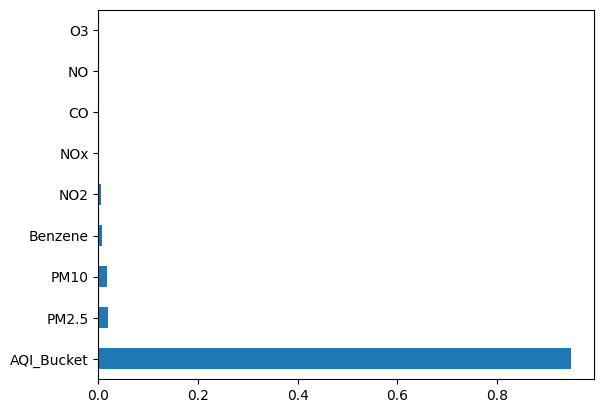

In [214]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(9).plot(kind='barh')
plt.show()

In [215]:
top_5_features = feat_importances.nlargest(5)
selected_columns = df[top_5_features.index]
df=selected_columns

In [216]:
df

,AQI_Bucket,PM2.5,PM10,Benzene,NO2
10229,1,313.22,607.98,14.36,36.39
10230,1,186.18,269.55,10.55,32.87
10231,3,87.18,131.90,3.91,30.31
10232,2,151.84,241.84,4.26,36.91
10233,2,146.60,219.13,2.80,34.92
...,...,...,...,...,...
12233,3,39.80,155.94,1.69,21.46
12234,3,59.52,308.65,1.71,21.60
12235,0,44.86,184.12,2.13,21.57
12236,3,39.80,91.98,1.57,17.96


In [217]:
train , test = train_test_split(df, test_size = 0.3)

x_train = train.drop('AQI_Bucket', axis=1)
y_train = train['AQI_Bucket']

x_test = test.drop('AQI_Bucket', axis = 1)
y_test = test['AQI_Bucket']

In [218]:
print(x_train[:5])

        PM2.5    PM10  Benzene    NO2
11130   35.10   88.82     0.39  99.75
11253  213.12  317.52     0.88  50.13
10888  161.11  477.65     4.50  88.27
10499   69.57  190.18     3.63  43.41
10645   76.12  137.44     3.07  30.51


In [219]:
print(y_train[:5])

11130    4
11253    1
10888    1
10499    0
10645    0
Name: AQI_Bucket, dtype: int64


In [220]:
scaler = MinMaxScaler(feature_range=(0, 1))

x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled)

x_test_scaled = scaler.fit_transform(x_test)
x_test = pd.DataFrame(x_test_scaled)

In [221]:
rmse_val = [] 
lst=[]
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(x_train, y_train)
    pred=model.predict(x_test)
    lst.append(pred)
    error = sqrt(mean_squared_error(y_test,pred)) 
    rmse_val.append(error) 
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 1.2747548783981961
RMSE value for k=  2 is: 1.1092414825756682
RMSE value for k=  3 is: 1.0559356040971437
RMSE value for k=  4 is: 1.0129885652530008
RMSE value for k=  5 is: 0.9940824915468535
RMSE value for k=  6 is: 0.9888732832726195
RMSE value for k=  7 is: 0.9703775827280968
RMSE value for k=  8 is: 0.9664421434657465
RMSE value for k=  9 is: 0.9658574731481938
RMSE value for k=  10 is: 0.9706870419106939
RMSE value for k=  11 is: 0.9694862460433452
RMSE value for k=  12 is: 0.9713428562791021
RMSE value for k=  13 is: 0.9742391964165266
RMSE value for k=  14 is: 0.9765011120161142
RMSE value for k=  15 is: 0.9750821427885885
RMSE value for k=  16 is: 0.9744088752931184
RMSE value for k=  17 is: 0.9723068563151092
RMSE value for k=  18 is: 0.9713488140305307
RMSE value for k=  19 is: 0.9676579754879264
RMSE value for k=  20 is: 0.9638118765263963


<Axes: >

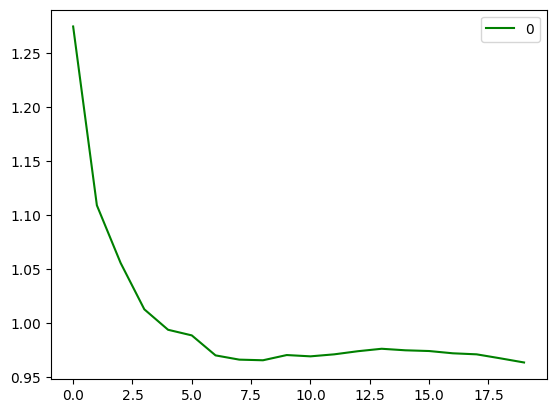

In [222]:
# plt.style.use('dark_background')
curve = pd.DataFrame(rmse_val)  
curve.plot(color='green')

# Perfomance metrics for KNN:

In [223]:
from sklearn.metrics import confusion_matrix

best_K = rmse_val.index(min(rmse_val)) + 1  # Find the K value with the minimum RMSE
model = neighbors.KNeighborsClassifier(n_neighbors=best_K)
model.fit(x_train, y_train)
pred = model.predict(x_test)

# Calculate the confusion matrix
confusion_mat = confusion_matrix(y_test, pred)
print("Confusion Matrix for the best K value:")
print(confusion_mat)


Confusion Matrix for the best K value:
[[115   1  20  30   0   1]
 [  0  51  13   0   0   0]
 [ 25  42  90   4   0   0]
 [ 20   0   2 125   5   2]
 [  4   0   0  15  26   4]
 [  0   0   0   0   0   5]]


In [224]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score
# confusion_mat = confusion_matrix(y_test, pred)

# Calculate other performance metrics
accuracy = accuracy_score(y_test, pred)

# Precision, Recall, and F1-score for multiclass classification
precision = precision_score(y_test, pred, average='weighted')
recall = recall_score(y_test, pred, average='weighted')
f1 = f1_score(y_test, pred, average='weighted')

# Calculate FPR and FNR for each class
n_classes = len(confusion_mat)
fpr = []
fnr = []

for i in range(n_classes):
    tn = np.sum(np.delete(confusion_mat, i, 0), 1)
    fp = np.sum(confusion_mat[i, :]) - confusion_mat[i, i]
    fn = np.sum(confusion_mat[i, :]) - confusion_mat[i, i]
    tp = confusion_mat[i, i]
    
    fpr_class = fp / (fp + tn)
    fnr_class = fn / (fn + tp)
    
    fpr.append(fpr_class)
    fnr.append(fnr_class)

# Cohen's Kappa
kappa = cohen_kappa_score(y_test, pred)
print("The perfomance metrics for KNN classification is:\n")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("False Positive Rates (FPR) for each class:", fpr)
print("False Negative Rates (FNR) for each class:", fnr)
print("Cohen's Kappa:", kappa)

The perfomance metrics for KNN classification is:

Accuracy: 0.6866666666666666
Precision: 0.702598923711387
Recall: 0.6866666666666666
F1 Score: 0.6847610805807623
False Positive Rates (FPR) for each class: [array([0.44827586, 0.24413146, 0.25242718, 0.51485149, 0.9122807 ]), array([0.07222222, 0.07471264, 0.07784431, 0.20967742, 0.72222222]), array([0.29831933, 0.52592593, 0.31555556, 0.59166667, 0.93421053]), array([0.14795918, 0.31182796, 0.15263158, 0.37179487, 0.85294118]), array([0.12105263, 0.26436782, 0.125     , 0.1299435 , 0.82142857]), array([0., 0., 0., 0., 0.])]
False Negative Rates (FNR) for each class: [0.31137724550898205, 0.203125, 0.4409937888198758, 0.18831168831168832, 0.46938775510204084, 0.0]
Cohen's Kappa: 0.5943846729187043


# Loss curve for KNN:

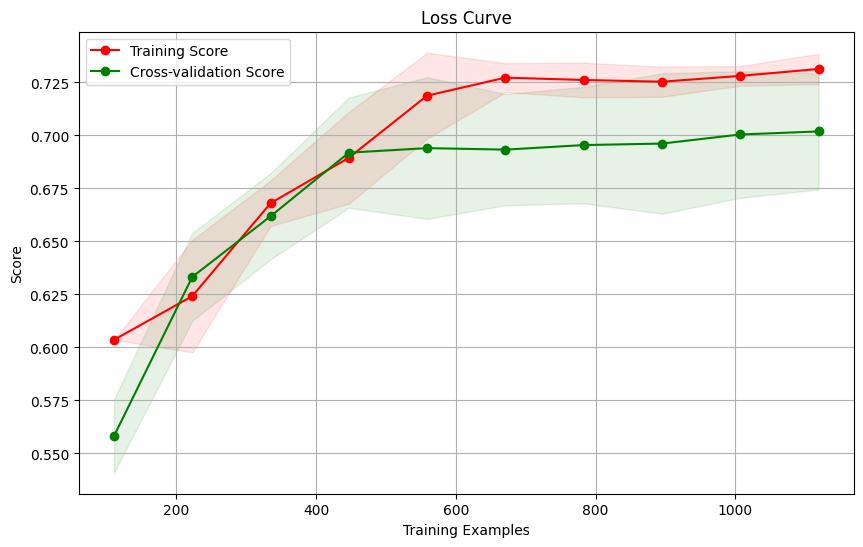

In [225]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import learning_curve

# Vary the training dataset size
train_sizes, train_scores, test_scores = learning_curve(model, x_train, y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)

# Calculate the mean and standard deviation of train and test scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Create a learning curve plot
plt.figure(figsize=(10, 6))
plt.title("Loss Curve")
plt.xlabel("Training Examples")
plt.ylabel("Score")
plt.grid()

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_mean, 'o-', color="r", label="Training Score")
plt.plot(train_sizes, test_mean, 'o-', color="g", label="Cross-validation Score")
plt.legend(loc="best")

plt.show()


# Multinomial Naive bayes classification

In [226]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

df=dataset
# Features
features = ['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO',
       'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI']
target = 'AQI_Bucket'

x_train, x_test, y_train, y_test = train_test_split(df[features], df[target],
                                                    train_size=0.7, test_size=0.3, shuffle=False)


In [227]:
# Print samples after running train_test_split
# print("X_train: {}, Y_train: {}".format(len(x_train), len(x_test)))
# print("X_train: {}, Y_train: {}".format(len(y_train), len(y_test)))
print("X_train: {}, X_test: {}".format(len(x_train), len(x_test)))
print("Y_train: {}, Y_test: {}".format(len(y_train), len(y_test)))

# Multinomial Naive Bayes Model setup after parameter tuning
model = MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

print(x_train)
model.fit(x_train, y_train)

X_train: 1399, X_test: 600
Y_train: 1399, Y_test: 600
       City          Date   PM2.5    PM10     NO    NO2     NOx     NH3  \
10229     0  1.420070e+09  313.22  607.98  69.16  36.39  110.59   33.85   
10230     0  1.420157e+09  186.18  269.55  62.09  32.87   88.14   31.83   
10231     0  1.420243e+09   87.18  131.90  25.73  30.31   47.95   69.55   
10232     0  1.420330e+09  151.84  241.84  25.01  36.91   48.62  130.36   
10233     0  1.420416e+09  146.60  219.13  14.01  34.92   38.25  122.88   
...     ...           ...     ...     ...    ...    ...     ...     ...   
11633     0  1.541376e+09  361.98  500.01  26.22  48.25   48.80   44.82   
11634     0  1.541462e+09  177.88  312.87  23.48  43.78   44.84   31.18   
11635     0  1.541549e+09  175.43  300.54  30.57  45.14   52.43   30.50   
11636     0  1.541635e+09  420.30  509.73  89.10  64.57  106.68   44.20   
11637     0  1.541722e+09  300.91  440.76  89.45  68.25  109.68   49.84   

          CO    SO2     O3  Benzene  Toluene 

MultinomialNB()

In [228]:
# Print results to evaluate model
print("Showing Performance Metrics for Naive Bayes Multinomial\n")
print ("Training Accuracy: {}".format(model.score(x_train, y_train)))
predicted = model.predict(x_test)
print ("Testing Accuracy: {}".format(accuracy_score(y_test, predicted)))

Showing Performance Metrics for Naive Bayes Multinomial

Training Accuracy: 0.7519656897784132
Testing Accuracy: 0.74


The code we have provided performs cross-validation to assess the accuracy of a machine learning model. It is using 10-fold cross-validation, which means the dataset is divided into 10 subsets, and the model is trained and tested 10 times, with a different subset used as the test set in each iteration. This is a common technique to estimate a model's performance while avoiding overfitting.

In [229]:
print("Cross Validation Accuracy: \n")
cv_accuracy = cross_val_score(estimator=model, X=x_train, y=y_train, cv=10)
print("Accuracy using 10 folds: ")
print(cv_accuracy)

Cross Validation Accuracy: 

Accuracy using 10 folds: 
[0.75       0.70714286 0.77857143 0.66428571 0.75714286 0.62142857
 0.80714286 0.79285714 0.77142857 0.76258993]


In [230]:
print("Mean accuracy: {}".format(cv_accuracy.mean()))
print("Standard Deviation: {}".format(cv_accuracy.std()))

Mean accuracy: 0.7412589928057554
Standard Deviation: 0.056158090569082886


# Perfomance metrics for NB:

In [231]:
# Rows: Predicted Values Columns: Actual Values

print("Confusion Matrix for Naive Bayes Multinomial\n")
labels = [0, 1, 2,3,4,5]
cm = confusion_matrix(y_test, predicted, labels=labels)
print(cm)

print("\n")

print('Precision, Recall and f-1 Scores for Naive Bayes Multinomial\n')
print(classification_report(y_test, predicted))

Confusion Matrix for Naive Bayes Multinomial

[[115   0  10  17   0   0]
 [  0  49   9   0   0   0]
 [ 19  10  77   0   0   0]
 [ 17   0   0 135  74   0]
 [  0   0   0   0  68   0]
 [  0   0   0   0   0   0]]


Precision, Recall and f-1 Scores for Naive Bayes Multinomial

              precision    recall  f1-score   support

           0       0.76      0.81      0.78       142
           1       0.83      0.84      0.84        58
           2       0.80      0.73      0.76       106
           3       0.89      0.60      0.71       226
           4       0.48      1.00      0.65        68

    accuracy                           0.74       600
   macro avg       0.75      0.80      0.75       600
weighted avg       0.79      0.74      0.74       600



In [232]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score
accuracy = accuracy_score(y_test, predicted)

# Precision, Recall, and F1-score for multiclass classification
precision = precision_score(y_test, predicted, average='weighted')
recall = recall_score(y_test, predicted, average='weighted')
f1 = f1_score(y_test, predicted, average='weighted')

# Calculate FPR and FNR for each class
n_classes = len(cm)
fpr = []
fnr = []

for i in range(n_classes):
    tn = np.sum(np.delete(cm, i, 0), 1)
    fp = np.sum(cm[i, :]) - cm[i, i]
    fn = np.sum(cm[i, :]) - cm[i, i]
    tp = cm[i, i]
    
    fpr_class = fp / (fp + tn)
    fnr_class = fn / (fn + tp)
    
    fpr.append(fpr_class)
    fnr.append(fnr_class)

# Cohen's Kappa
kappa = cohen_kappa_score(y_test, predicted)

print("The perfomance metrics are:\n")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("False Positive Rates (FPR) for each class:", fpr)
print("False Negative Rates (FNR) for each class:", fnr)
print("Cohen's Kappa:", kappa)

The perfomance metrics are:

Accuracy: 0.74
Precision: 0.7910384745253531
Recall: 0.74
F1 Score: 0.743878868712985
False Positive Rates (FPR) for each class: [array([0.31764706, 0.20300752, 0.10671937, 0.28421053, 1.        ]), array([0.05960265, 0.07826087, 0.03829787, 0.11688312, 1.        ]), array([0.16959064, 0.33333333, 0.11372549, 0.29896907, 1.        ]), array([0.39055794, 0.61073826, 0.46192893, 0.57232704, 1.        ]), array([ 0.,  0.,  0.,  0., nan]), array([0., 0., 0., 0., 0.])]
False Negative Rates (FNR) for each class: [0.19014084507042253, 0.15517241379310345, 0.27358490566037735, 0.4026548672566372, 0.0, nan]
Cohen's Kappa: 0.6668470058942453


C:\Users\rppon\AppData\Local\Temp\ipykernel_3564\4214717264.py:20: RuntimeWarning: invalid value encountered in divide
  fpr_class = fp / (fp + tn)
C:\Users\rppon\AppData\Local\Temp\ipykernel_3564\4214717264.py:21: RuntimeWarning: invalid value encountered in scalar divide
  fnr_class = fn / (fn + tp)


# Loss curve for NB:

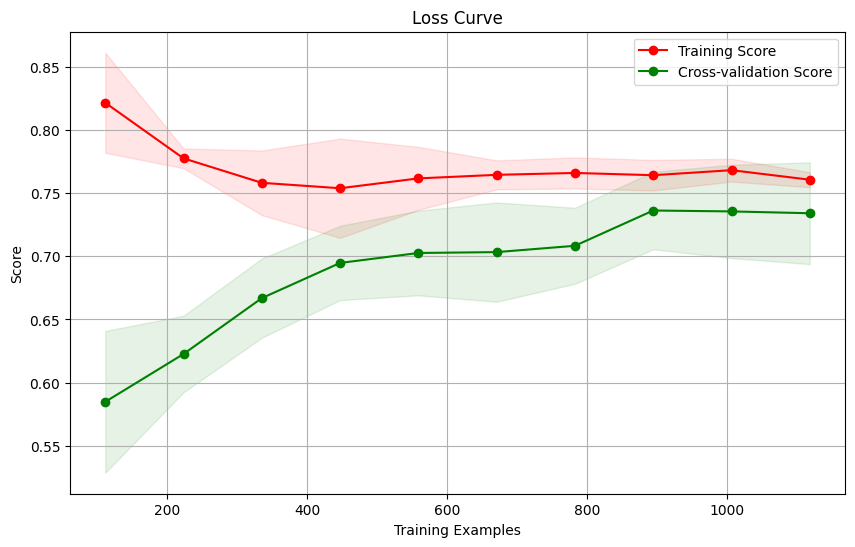

In [233]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(model, x_train, y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)


plt.figure(figsize=(10, 6))
plt.title("Loss Curve")
plt.xlabel("Training Examples")
plt.ylabel("Score")
plt.grid()

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_mean, 'o-', color="r", label="Training Score")
plt.plot(train_sizes, test_mean, 'o-', color="g", label="Cross-validation Score")
plt.legend(loc="best")

plt.show()


Inferences:

-->'Support' is the number of occurrences of each particular class in the true responses (responses in your test set). You can calculate it by summing the rows of the confusion matrix.

-->An increase in the cross-validation score with respect to the training data size typically indicates that the model is benefiting from a larger amount of training data. 
-->We observe that the training score decreases as the training data size increases, while the cross-validation score increases; but this is not necessarily a problem. In fact, this behavior is quite common and can be expected in certain situations. Here's why this might occur and how to interpret it:

Overfitting Reduction: As you increase the training data size, the model has to generalize from a larger and more diverse set of examples. This can reduce the likelihood of overfitting, which is when the model fits the training data noise rather than the underlying patterns. Overfitting is more likely to occur when the model has access to a small amount of training data, as it can memorize the data instead of learning from it.

# Decision Tree classifier using Scikit-learn

In [234]:
from sklearn.model_selection import train_test_split

df=dataset
X = df.drop('AQI_Bucket',axis=1)
y = df['AQI_Bucket']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [235]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(criterion='entropy',max_depth=6)
dtree.fit(x_train,y_train)
pred = dtree.predict(x_test)

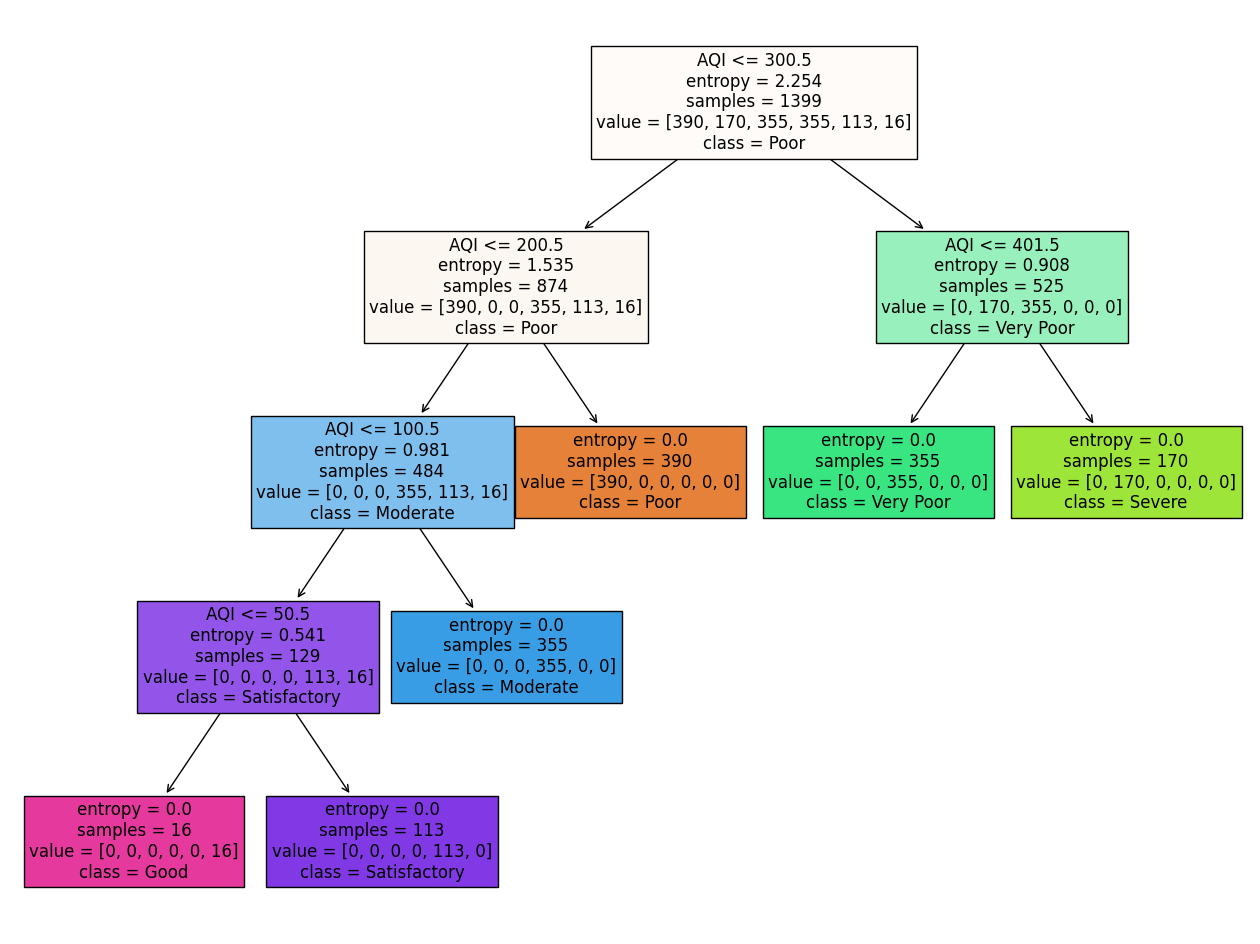

In [236]:
from sklearn.tree import plot_tree

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(16,12))
a = plot_tree(dtree, feature_names=dataset.columns, fontsize=12, filled=True, 
              class_names=['Poor','Severe','Very Poor','Moderate','Satisfactory','Good'])

# Perfomance metrics for Decsion tree:

In [237]:
# Calculate the confusion matrix
from sklearn.metrics import confusion_matrix
confusion_mat = confusion_matrix(y_test, pred)
print("Confusion Matrix:")
print(confusion_mat)

Confusion Matrix:
[[152   0   0   0   0   0]
 [  0  67   2   0   0   0]
 [  0   0 165   0   0   0]
 [  0   0   0 164   0   0]
 [  0   0   0   0  45   0]
 [  0   0   0   0   0   5]]


In [238]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score
# confusion_mat = confusion_matrix(y_test, pred)

# Calculate other performance metrics
accuracy = accuracy_score(y_test, pred)

# Precision, Recall, and F1-score for multiclass classification
precision = precision_score(y_test, pred, average='weighted')
recall = recall_score(y_test, pred, average='weighted')
f1 = f1_score(y_test, pred, average='weighted')

# Calculate FPR and FNR for each class
n_classes = len(confusion_mat)
fpr = []
fnr = []

for i in range(n_classes):
    tn = np.sum(np.delete(confusion_mat, i, 0), 1)
    fp = np.sum(confusion_mat[i, :]) - confusion_mat[i, i]
    fn = np.sum(confusion_mat[i, :]) - confusion_mat[i, i]
    tp = confusion_mat[i, i]
    
    fpr_class = fp / (fp + tn)
    fnr_class = fn / (fn + tp)
    
    fpr.append(fpr_class)
    fnr.append(fnr_class)

# Cohen's Kappa
kappa = cohen_kappa_score(y_test, pred)
print("The perfomance metrics for Decision tree classification is:\n")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("False Positive Rates (FPR) for each class:", fpr)
print("False Negative Rates (FNR) for each class:", fnr)
print("Cohen's Kappa:", kappa)

The perfomance metrics for Decision tree classification is:

Accuracy: 0.9966666666666667
Precision: 0.9967065868263474
Recall: 0.9966666666666667
F1 Score: 0.9966521970233877
False Positive Rates (FPR) for each class: [array([0., 0., 0., 0., 0.]), array([0.01298701, 0.01197605, 0.01204819, 0.04255319, 0.28571429]), array([0., 0., 0., 0., 0.]), array([0., 0., 0., 0., 0.]), array([0., 0., 0., 0., 0.]), array([0., 0., 0., 0., 0.])]
False Negative Rates (FNR) for each class: [0.0, 0.028985507246376812, 0.0, 0.0, 0.0, 0.0]
Cohen's Kappa: 0.9956485792611287


# Loss curve for Decision tree:

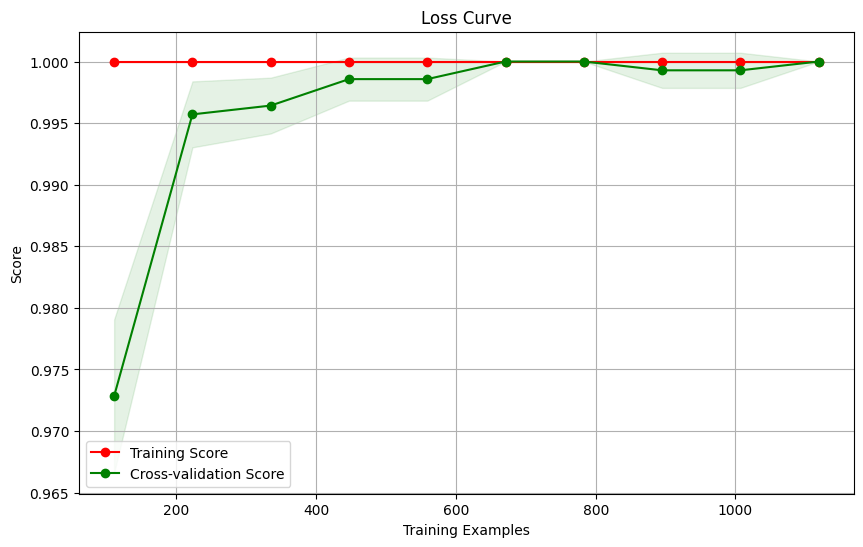

In [239]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(dtree, x_train, y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)


plt.figure(figsize=(10, 6))
plt.title("Loss Curve")
plt.xlabel("Training Examples")
plt.ylabel("Score")
plt.grid()

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_mean, 'o-', color="r", label="Training Score")
plt.plot(train_sizes, test_mean, 'o-', color="g", label="Cross-validation Score")
plt.legend(loc="best")

plt.show()


# ROC AUC curve:

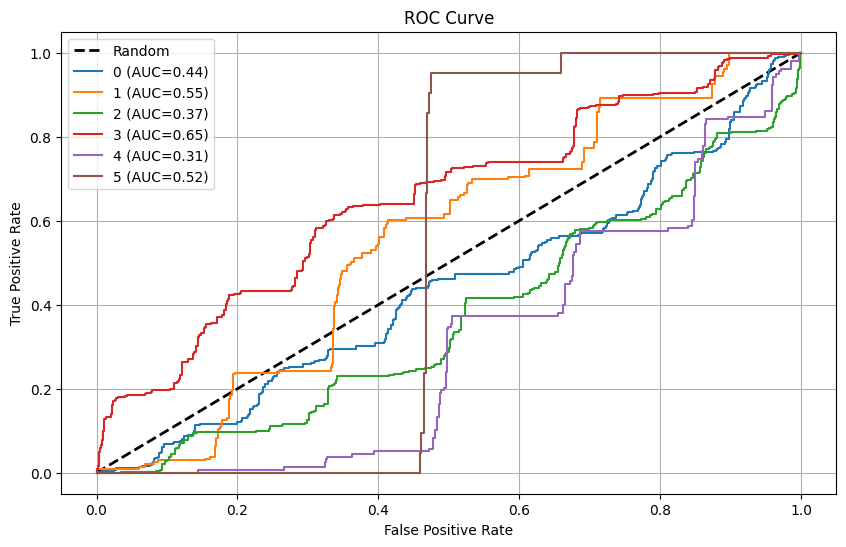

In [183]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score

np.random.seed(0)

# Artificially add noise to make the task harder
df = dataset  # Replace 'dataset' with your actual DataFrame
samples = df.AQI_Bucket.sample(n=50, random_state=0)
np.random.shuffle(samples.values)
df.loc[samples.index, 'AQI_Bucket'] = samples.values

# Define the inputs and outputs
X = df.drop(columns=['AQI_Bucket'])
y = df['AQI_Bucket']

# Fit the model
model = LogisticRegression(max_iter=200)
model.fit(X, y)
y_scores = model.predict_proba(X)

# One hot encode the labels in order to plot them
y_onehot = pd.get_dummies(y, columns=model.classes_)

# Create an empty figure and iteratively add new lines
# every time we compute a new class
plt.figure(figsize=(10, 6))
plt.plot([0, 1], [0, 1], 'k--', linewidth=2, label='Random')
    
for i in range(y_scores.shape[1]):
    y_true = y_onehot.iloc[:, i]
    y_score = y_scores[:, i]

    fpr, tpr, _ = roc_curve(y_true, y_score)
    auc_score = roc_auc_score(y_true, y_score)

    name = f"{y_onehot.columns[i]} (AUC={auc_score:.2f})"
    plt.plot(fpr, tpr, label=name)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.grid()
plt.show()


# PR Curve:

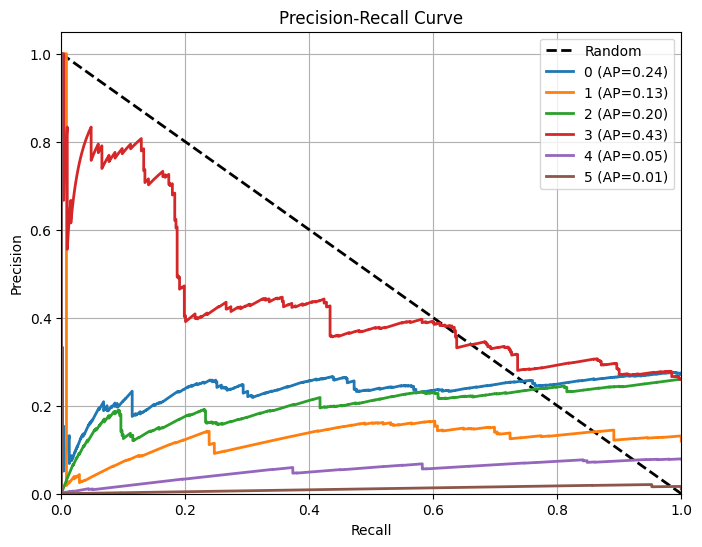

In [185]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.datasets import make_classification

np.random.seed(0)

# Artificially add noise to make the task harder
df = dataset  # Replace with your actual DataFrame
samples = df.AQI_Bucket.sample(n=30, random_state=0)
np.random.shuffle(samples.values)
df.loc[samples.index, 'AQI_Bucket'] = samples.values

# Define the inputs and outputs
X = df.drop(columns=['AQI_Bucket'])
y = df['AQI_Bucket']
y_onehot = pd.get_dummies(y, columns=y.unique())

# Fit the model
model = LogisticRegression(max_iter=200)
model.fit(X, y)
y_scores = model.predict_proba(X)

# Create an empty figure and iteratively add new lines
# every time we compute a new class
plt.figure(figsize=(8, 6))
plt.plot([0, 1], [1, 0], 'k--', label='Random', lw=2)

for i in range(y_scores.shape[1]):
    y_true = y_onehot.iloc[:, i]
    y_score = y_scores[:, i]

    precision, recall, _ = precision_recall_curve(y_true, y_score)
    auc_score = average_precision_score(y_true, y_score)

    name = f"{y_onehot.columns[i]} (AP={auc_score:.2f})"
    plt.plot(recall, precision, label=name, lw=2)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f'Precision-Recall Curve')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.legend(loc='best')
plt.grid()
plt.show()
